In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Import digits and mask image

In [2]:
mask = cv2.imread('img/mask.png', 0)
src = cv2.imread('img/digits.png', 0)

Convert binary inverse

In [3]:
_, dst = cv2.threshold(src, 127, 255, cv2.THRESH_BINARY_INV)

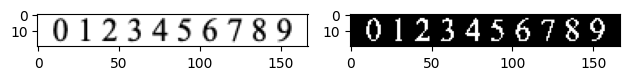

In [4]:
plt.subplot(1, 2, 1)
plt.imshow(src, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')
plt.tight_layout()
plt.show()

Find contours and crop images

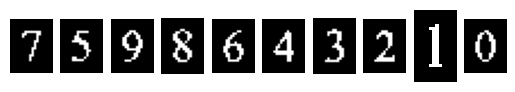

In [5]:
contours, _ = cv2.findContours(dst, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

pad = 5
digits_imgs = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    crop = dst[y:y+h, x:x+w]
    border = cv2.copyMakeBorder(crop, pad, pad, pad, pad, cv2.BORDER_CONSTANT, None, 0)
    digits_imgs.append(border)

fig = plt.figure()
for i in range(10):
    fig.add_subplot(1, 10, i+1)
    plt.imshow(digits_imgs[i], cmap='gray')
    plt.axis('off')
plt.show()
    

Add mask filter on the digits image

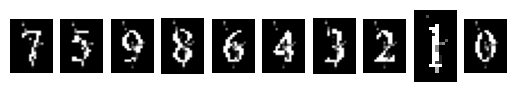

In [7]:
digits_mask = []
for img in digits_imgs:
    h, w = img.shape
    k = cv2.resize(mask, (w, h))
    digits_mask.append(img + k)
    
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(digits_mask[i], cmap='gray')
    plt.axis('off')
plt.show()